### Load libraries

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load data

In [197]:
data= pd.read_csv("..\\data\\raw\\Clean_Dataset.csv")

# Data exploration

In [198]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [199]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Seems like the id has a weird name

In [201]:
data.rename(columns={"Unnamed: 0":"id"},inplace=True)
data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Univariate analysis


Let's analyze the features of this dataset

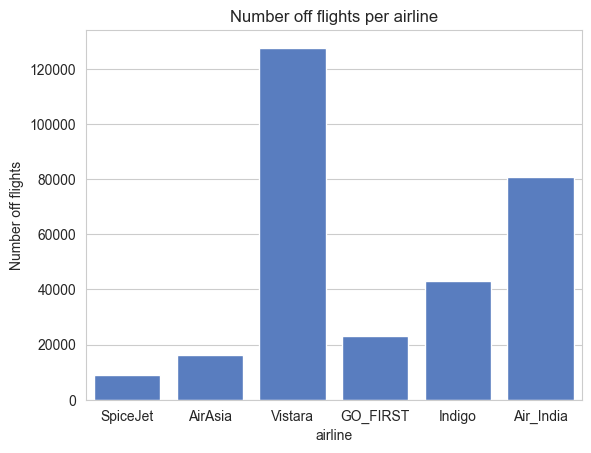

In [202]:
sns.set_palette("muted")
sns.set_style("whitegrid")
sns.countplot(data=data, x="airline",stat='count')
plt.ylabel("Number off flights")
plt.title("Number off flights per airline")
plt.show()

In [203]:
data["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

We can see that we have a huge part of the flights from Vistara and less tan 10000 for SpiceJet

In [204]:
data["flight"].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-2914       1
G8-107        1
SG-9974       1
6E-865        1
SG-8339       1
Name: count, Length: 1561, dtype: int64

Seems like some flights are used multiple times, we will surely delete this feature 

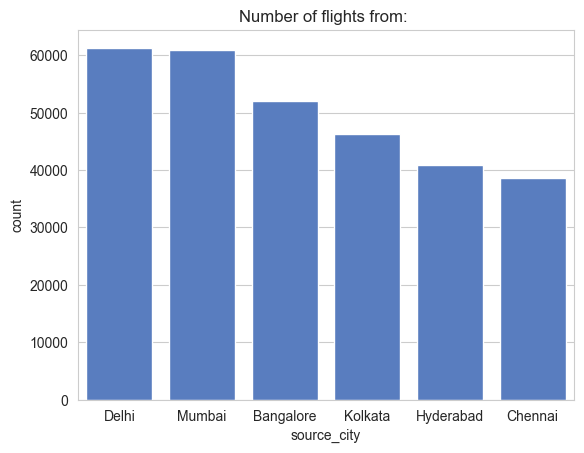

In [205]:
sns.countplot(data=data,x="source_city")
plt.title("Number of flights from: ")
plt.show()

In [206]:
data["source_city"].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

We have 6 different cities as the source city, they have the same order of magnitude 10⁴

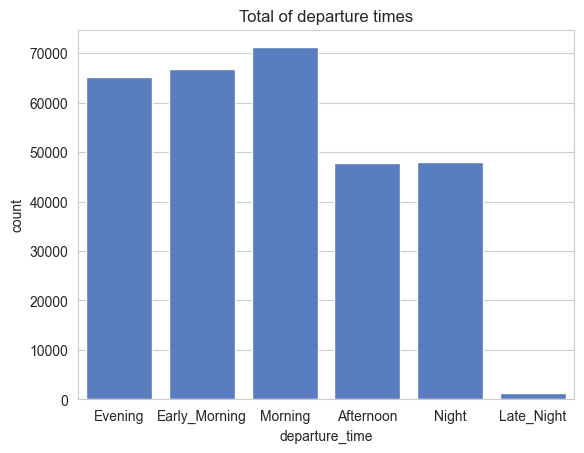

In [207]:
sns.countplot(data=data, x="departure_time")
plt.title("Total of departure times")
plt.show()

In [208]:
data["departure_time"].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

We only have 1306 flights with a departure time as Late_Night, wich is very low compared to the others. We will later see if we keep this category

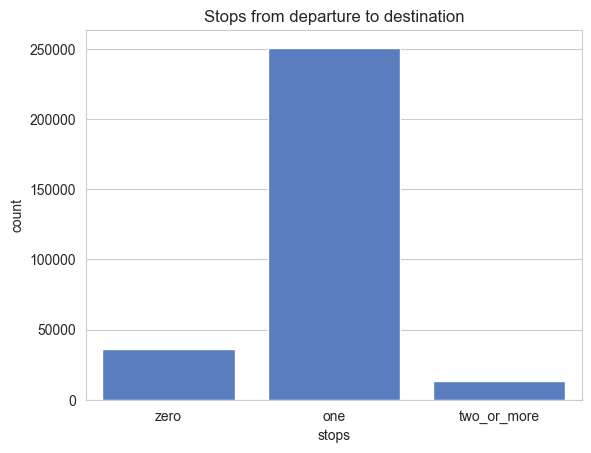

In [209]:
sns.countplot(data=data,x="stops")
plt.title("Stops from departure to destination")
plt.show()

In [210]:
data["stops"].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

"one" represents more than 80% off the three categories, this represents another feature that we will further discuss due to class imbalance

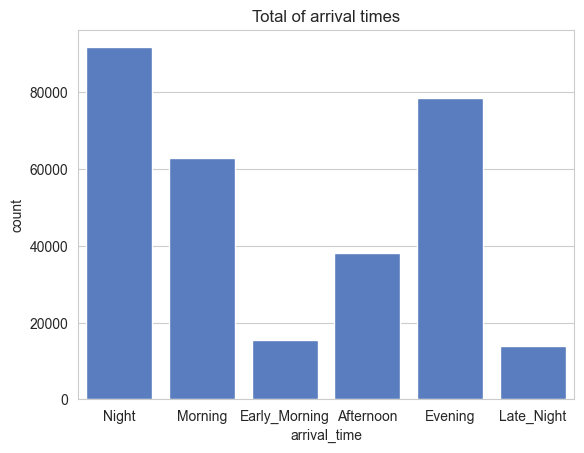

In [211]:
sns.countplot(data=data, x="arrival_time")
plt.title("Total of arrival times")
plt.show()

In [212]:
data["arrival_time"].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

"Like for the feature departure_time, late_night is the least frequent category.



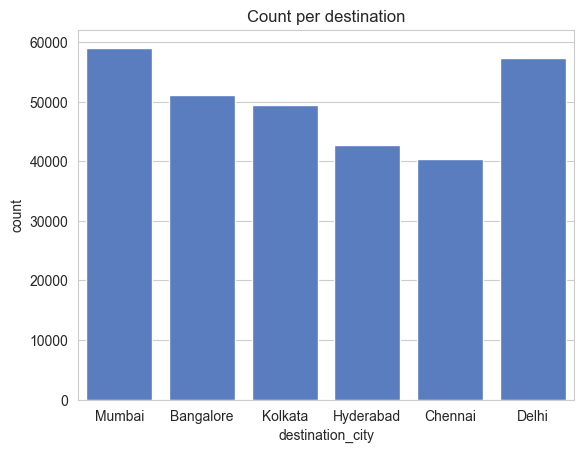

In [213]:
sns.countplot(data=data,x="destination_city")
plt.title("Count per destination")
plt.show()

In [214]:
data["destination_city"].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

Like for source_city, we have the same order of magnitude for each city

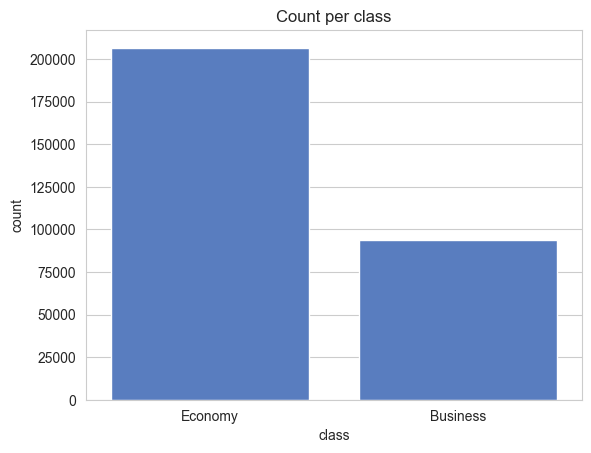

In [215]:
sns.countplot(data=data,x="class")
plt.title("Count per class")
plt.show()

In [216]:
data['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

The economy class represents approximately 66% of the total 

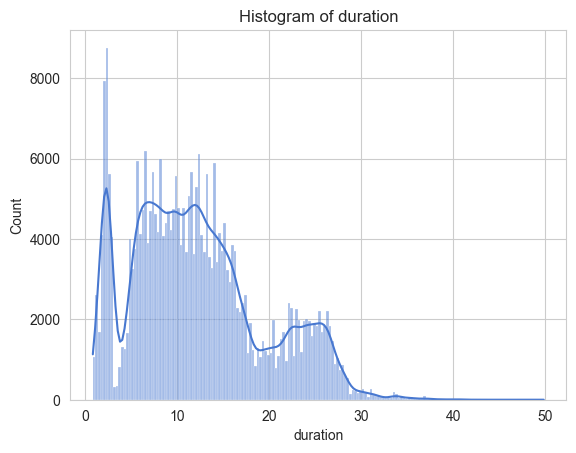

In [217]:
sns.histplot(data=data, x="duration",kde=True)
plt.title("Histogram of duration")
plt.show()

In [218]:
data["duration"].describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

The flights have different durations, with a minimum of 0.83 and a maximum of 49.83. The mean and median are very close, which is a clue that there are no outliers.

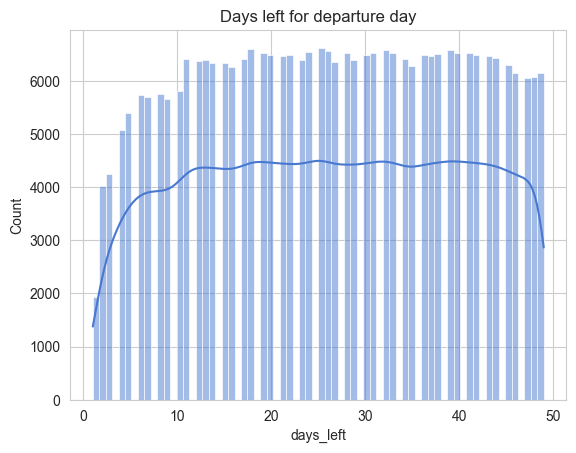

In [219]:
sns.histplot(data=data,x="days_left",kde=True)
plt.title("Days left for departure day")
plt.show()

In [220]:
data["days_left"].describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

The data includes flights departing in a minimum of 1 day and a maximum of 49 days, with a mean of 26 days

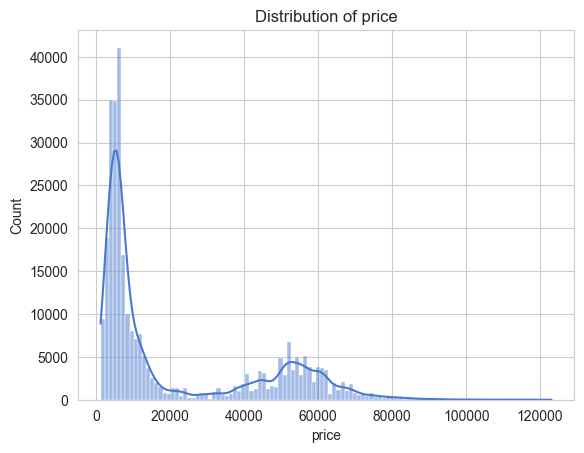

In [221]:
sns.histplot(data=data,x="price",kde=True)
plt.title("Distribution of price")
plt.show()

In [135]:
data["price"].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

We have different prices; the cheapest is 1105 and the most expensive is 123,071. The mean and median are very different, which may be a hint that there are outliers

## Bivariate analysis

Let's first focus on the Airline feature

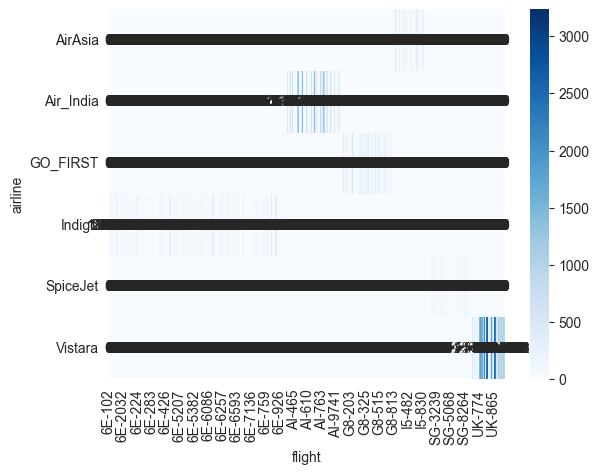

In [222]:
contingence=pd.crosstab(data["airline"],data["flight"])
sns.heatmap(contingence,annot=True, cmap="Blues")
plt.show()

There is way too much flight numbers to be able to read the heatmap

In [223]:
from scipy.stats import chi2_contingency
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 0.0


In [138]:
(data["flight"].value_counts()).count()

np.int64(1561)

It is expected that the flight number and the airline are correlated, as there are only 1,561 unique flight numbers across 30,000 rows of data.

The 'flight' feature will be removed from the dataset.

In [139]:
data.drop(labels='flight',inplace=True,axis=1)

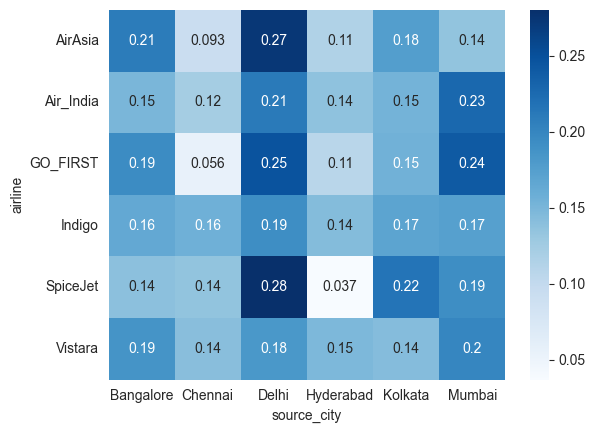

In [140]:
contingence=pd.crosstab(data["airline"],data["source_city"],normalize='index')
sns.heatmap(contingence,annot=True, cmap="Blues")
plt.show()

We can see that most airlines have the highest percentage of their flights coming from Delhi, which is expected since it is the capital.

In [ ]:
contingence=pd.crosstab(data["airline"],data["source_city"])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 0.0


Since the p-value is lower than 0.05, we reject the null hypothesis, suggesting that the two variables are dependent.

We will later consider deleting one of the features and training the model separately with each feature to compare results

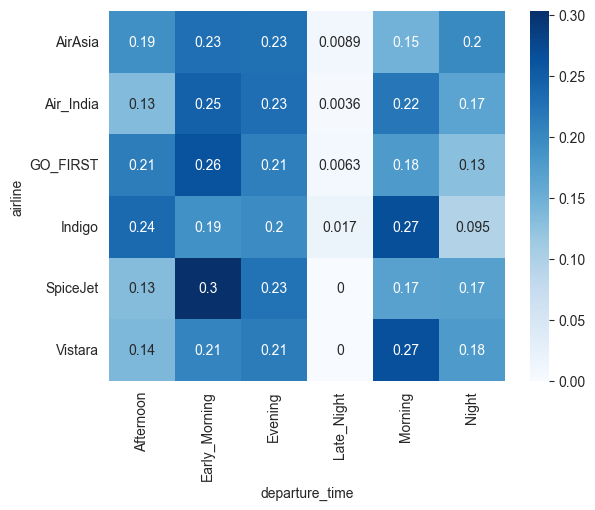

In [142]:
contingence=pd.crosstab(data['airline'],data['departure_time'],normalize='index')
sns.heatmap(contingence,annot=True,cmap="Blues")
plt.show()

As we saw in the univariate analysis, there are only 1,306 rows for the 'late_night' category, whereas the other categories are more balanced

In [228]:
contingence=pd.crosstab(data['airline'],data['departure_time'])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 0.0


Here we have the same issue as before we will do the same reasoning

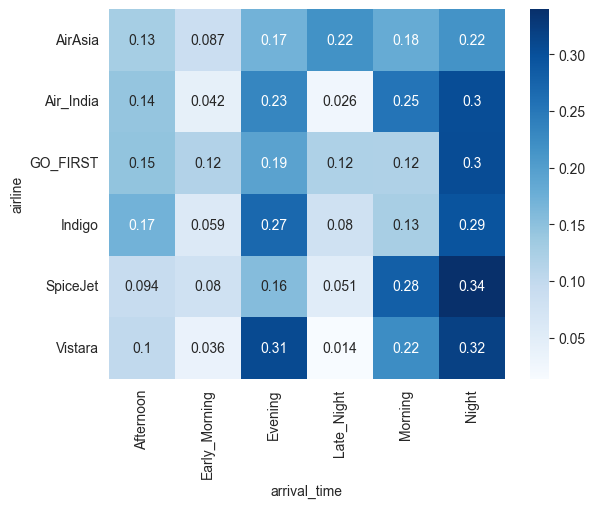

In [144]:
sns.heatmap(pd.crosstab(data["airline"],data["arrival_time"],normalize='index'),cmap='Blues',annot=True)
plt.show()

In [232]:
contingence=pd.crosstab(data['airline'],data['arrival_time'])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p value is: {p}")

The p value is: 0.0


Same as before

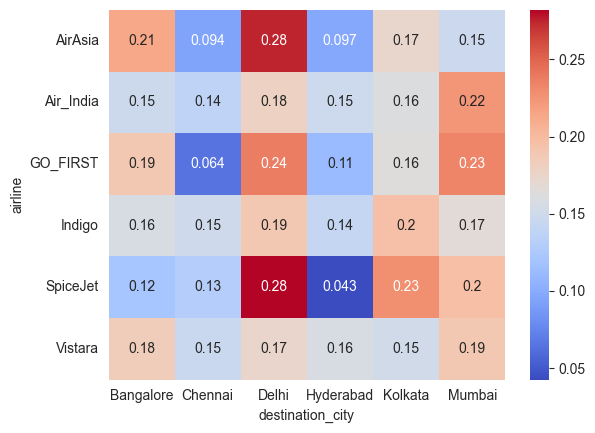

In [146]:
sns.heatmap(pd.crosstab(data["airline"],data["destination_city"],normalize='index'),annot=True,cmap='coolwarm')
plt.show()

In [234]:
contingence=pd.crosstab(data['airline'],data['destination_city'])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 0.0


Another feature that is statistically dependant

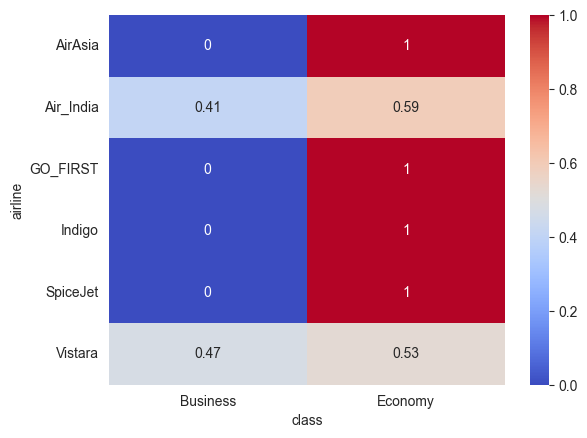

In [148]:
sns.heatmap(pd.crosstab(data["airline"],data["class"],normalize='index'),annot=True,cmap='coolwarm')
plt.show()

We can directly see that only the airline Air India and Vistara has business class flights, the features will be surely dependant

In [236]:
contingence=pd.crosstab(data['airline'],data['class'])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 0.0


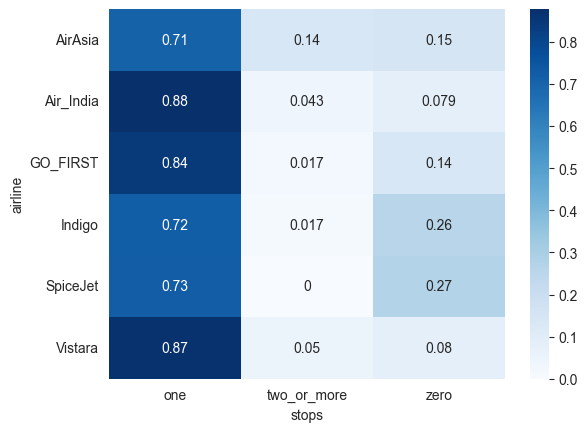

In [151]:
sns.heatmap(pd.crosstab(data["airline"],data['stops'],normalize='index'),annot=True, cmap='Blues')
plt.show()

Most of the flights have one stop, the Airlines with most direct flights are Indigo and SpiceJet

In [238]:
contingence=pd.crosstab(data['airline'],data['stops'])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"Voici la p-value: {p}")

Voici la p-value: 0.0


The features are statistically dependant, wich is normal because some airlines decide to do more or less stops 

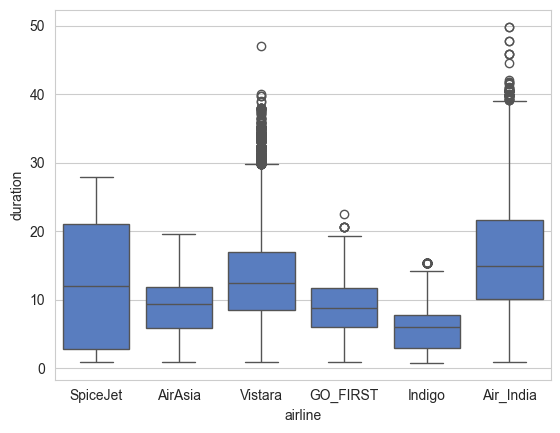

In [153]:
sns.boxplot(data=data,x='airline',y="duration")
plt.show()

In [ ]:
data["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

Seems that the duration of a flight change depending on the airline, let's see how much the feature airline explains the feature duration

In [ ]:
group_stats = data.groupby('airline')['duration'].agg(['count', 'mean', 'var'])
group_stats.columns = ['effectif', 'moyenne', 'variance']
N = len(data)
var_intra = (group_stats['effectif'] * group_stats['variance']).sum() / N
mu_total = data['duration'].mean()
var_inter = ((group_stats['effectif'] * (group_stats['moyenne'] - mu_total)**2).sum()) / N
var_totale = data['duration'].var()
var_totale2 = var_intra + var_inter
eta_squared = var_inter / var_totale
print(f"Rapport de corrélation η² = {eta_squared}")

Rapport de corrélation η² = 0.21006552646441007


So 21% of the variability of the duration is explained by the airline

Let's see the same thing for days_left

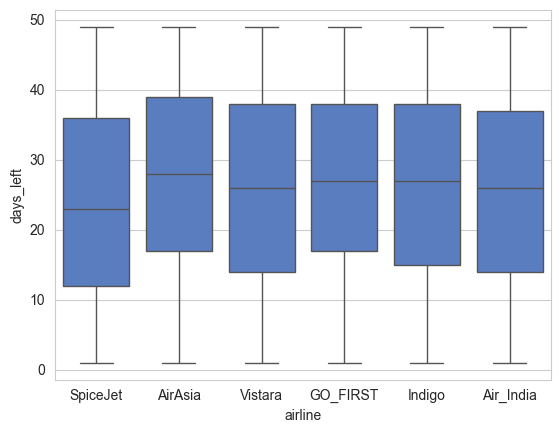

In [160]:
sns.boxplot(data=data,x='airline',y="days_left")
plt.show()

In [163]:
data.groupby("airline")["days_left"].describe()

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
AirAsia,16098.0,27.735184,12.889223,1.0,17.0,28.0,39.0,49.0
Air_India,80892.0,25.497466,13.725776,1.0,14.0,26.0,37.0,49.0
GO_FIRST,23173.0,27.430415,12.385957,1.0,17.0,27.0,38.0,49.0
Indigo,43120.0,26.264309,13.717115,1.0,15.0,27.0,38.0,49.0
SpiceJet,9011.0,24.122850,13.658816,1.0,12.0,23.0,36.0,49.0
Vistara,127859.0,25.894532,13.638537,1.0,14.0,26.0,38.0,49.0


It seems like the data was equilibrated in these sense

In [164]:
group_stats = data.groupby('airline')['days_left'].agg(['count', 'mean', 'var'])
group_stats.columns = ['effectif', 'moyenne', 'variance']
N = len(data)
var_intra = (group_stats['effectif'] * group_stats['variance']).sum() / N
mu_total = data['days_left'].mean()
var_inter = ((group_stats['effectif'] * (group_stats['moyenne'] - mu_total)**2).sum()) / N
var_totale = data['days_left'].var()
var_totale2 = var_intra + var_inter
eta_squared = var_inter / var_totale
print(f"Rapport de corrélation η² = {eta_squared}")

Rapport de corrélation η² = 0.0027626020319086162


0.2% ofthe variability of the days_left is explained by the airline

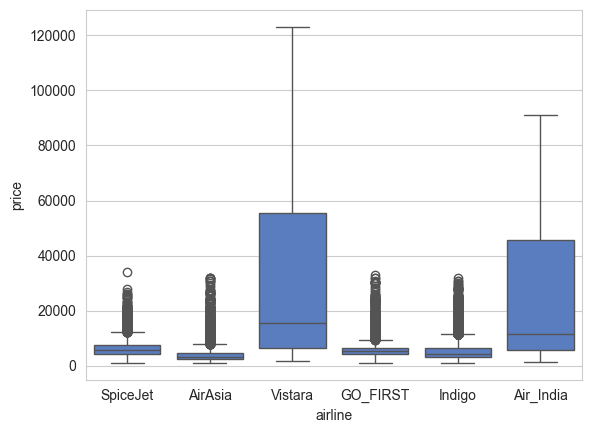

In [165]:
sns.boxplot(data=data,x='airline',y='price')
plt.show()

In [166]:
data.groupby("airline")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
AirAsia,16098.0,4091.072742,2824.055172,1105.0,2361.0,3276.0,4589.0,31917.0
Air_India,80892.0,23507.019112,20905.116909,1526.0,5623.0,11520.0,45693.0,90970.0
GO_FIRST,23173.0,5652.007595,2513.865560,1105.0,4205.0,5336.0,6324.0,32803.0
Indigo,43120.0,5324.216303,3268.894831,1105.0,3219.0,4453.0,6489.0,31952.0
SpiceJet,9011.0,6179.278881,2999.630406,1106.0,4197.0,5654.0,7412.0,34158.0
Vistara,127859.0,30396.536302,25637.159445,1714.0,6412.0,15543.0,55377.0,123071.0


The airline really determines if the price increase or not, we should take in consideration the fact that Air_India and Vistara are the only ones with Economy class.

In [167]:
group_stats = data.groupby('airline')['price'].agg(['count', 'mean', 'var'])
group_stats.columns = ['effectif', 'moyenne', 'variance']
N = len(data)
var_intra = (group_stats['effectif'] * group_stats['variance']).sum() / N
mu_total = data['price'].mean()
var_inter = ((group_stats['effectif'] * (group_stats['moyenne'] - mu_total)**2).sum()) / N
var_totale = data['price'].var()
var_totale2 = var_intra + var_inter
eta_squared = var_inter / var_totale
print(f"Rapport de corrélation η² = {eta_squared}")

Rapport de corrélation η² = 0.2226560250068851


Approximately 22% of the variability of price is explained by the Airline

Let's continue with source_city

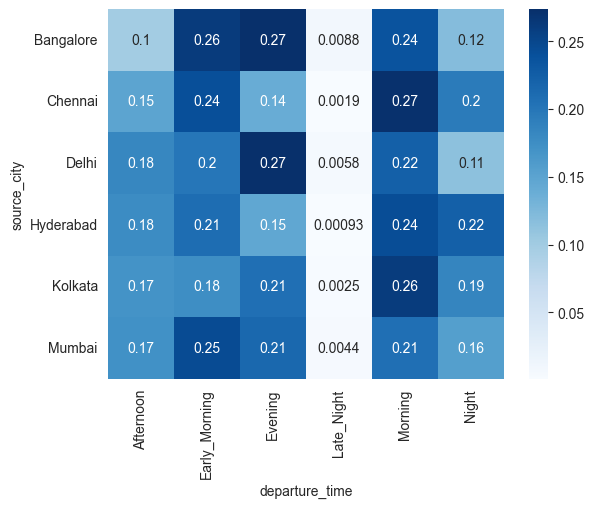

In [176]:
sns.heatmap(pd.crosstab(data["source_city"],data["departure_time"],normalize='index'),cmap='Blues',annot=True)
plt.yticks(rotation=0)
plt.show()

In [240]:
contingence=pd.crosstab(data["source_city"],data["departure_time"])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 0.0


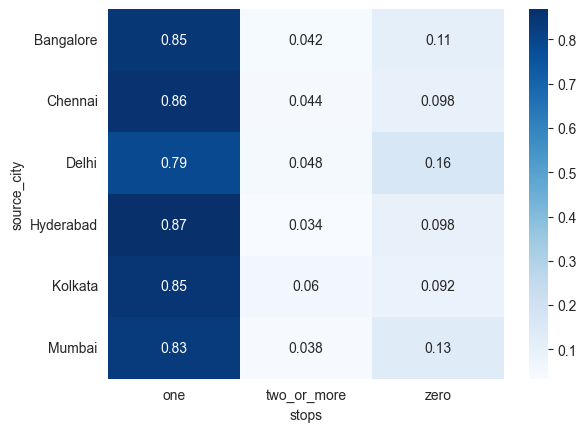

In [179]:
sns.heatmap(pd.crosstab(data["source_city"],data["stops"],normalize='index'),cmap='Blues',annot=True)
plt.yticks(rotation=0)
plt.show()

In [242]:
contingence=pd.crosstab(data["source_city"],data["stops"])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 0.0


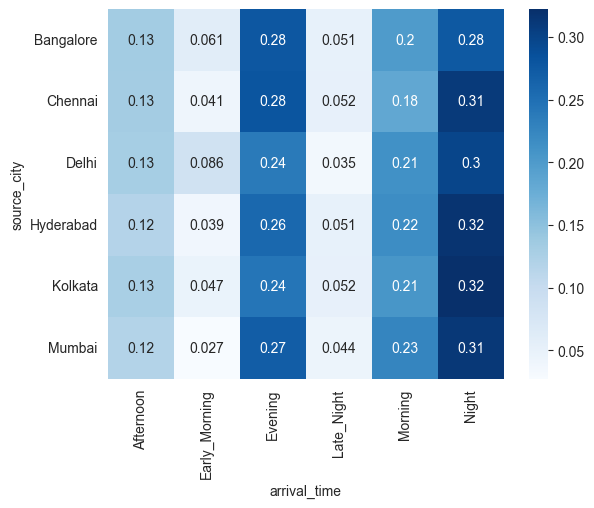

In [181]:
sns.heatmap(pd.crosstab(data["source_city"],data["arrival_time"],normalize='index'),cmap='Blues',annot=True)
plt.yticks(rotation=0)
plt.show()

In [244]:
contingence=pd.crosstab(data["source_city"],data["arrival_time"])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 0.0


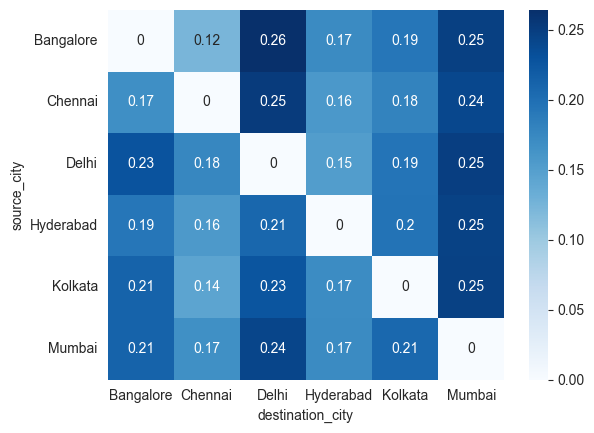

In [183]:
sns.heatmap(pd.crosstab(data["source_city"],data["destination_city"],normalize='index'),cmap='Blues',annot=True)
plt.yticks(rotation=0)
plt.show()

For each city except Mumbai, 25% of the flights are to Mumbai

In [246]:
contingence=pd.crosstab(data["source_city"],data["destination_city"])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 0.0


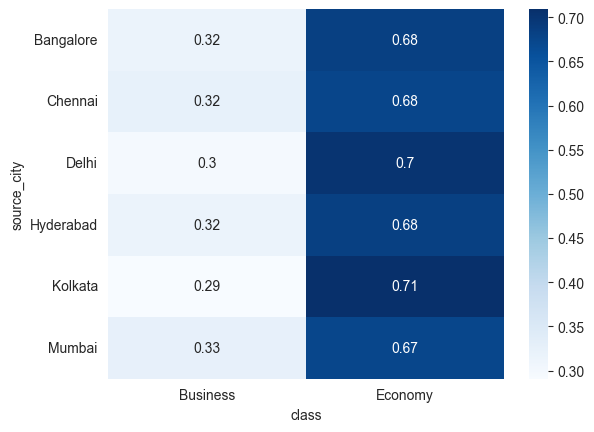

In [185]:
sns.heatmap(pd.crosstab(data["source_city"],data["class"],normalize='index'),cmap='Blues',annot=True)
plt.yticks(rotation=0)
plt.show()

In [186]:
data['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

Approximately 30% of the flights are in business class, and that in general and as well for every source city

In [187]:
contingence=pd.crosstab(data["source_city"],data["class"])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 5.049342709943103e-49


From the beggining we only had p-values = 0, let's try a different approach:

In [192]:
# Exemple en Python avec pandas
sample = data[["source_city","class"]].sample(n=100, random_state=42)
contingency = pd.crosstab(sample["source_city"], sample["class"])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"The p-value is: {p}")

The p-value is: 0.9177702521023734


It seems like the p-value changes drastically when we lower our sample, after some research it is normal, to actually see if the dependancy is strong we swill use Cramers V

https://www.ibm.com/docs/en/cognos-analytics/12.0.x?topic=terms-cramrs-v

In [248]:
def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

In [249]:
contingency = pd.crosstab(data["source_city"], data["class"])
v = cramers_v(contingency)
print(f"Cramér’s V : {v:.4f}")

Cramér’s V : 0.0281


The result is weak, we have 0.028<0.2 so the fields are only weakly associated

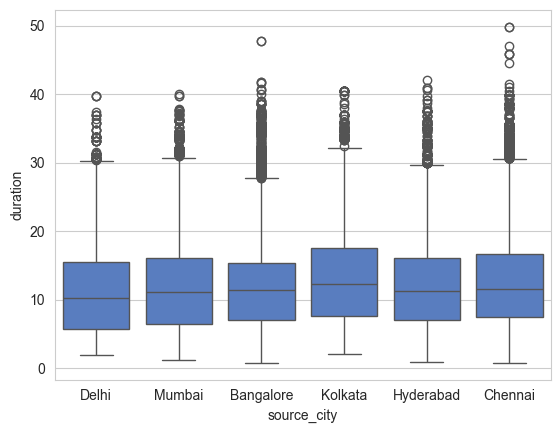

In [250]:
sns.boxplot(data=data,x="source_city",y="duration")
plt.show()

In [251]:
data.groupby("source_city")['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
source_city,,,,,,,,
Bangalore,52061.0,12.029203,6.966650,0.83,7.00,11.42,15.33,47.75
Chennai,38700.0,12.838901,7.353063,0.83,7.50,11.58,16.75,49.83
Delhi,61343.0,11.515499,7.336256,1.92,5.75,10.25,15.58,39.67
Hyderabad,40806.0,12.268075,6.993185,0.92,7.08,11.25,16.17,42.00
Kolkata,46347.0,13.249898,7.223163,2.08,7.67,12.25,17.50,40.50
Mumbai,60896.0,11.888448,7.121188,1.17,6.42,11.08,16.17,40.00


In [252]:
group_stats = data.groupby('source_city')['duration'].agg(['count', 'mean', 'var'])
group_stats.columns = ['effectif', 'moyenne', 'variance']
N = len(data)
var_intra = (group_stats['effectif'] * group_stats['variance']).sum() / N
mu_total = data['duration'].mean()
var_inter = ((group_stats['effectif'] * (group_stats['moyenne'] - mu_total)**2).sum()) / N
var_totale = data['duration'].var()
var_totale2 = var_intra + var_inter
eta_squared = var_inter / var_totale
print(f"Rapport de corrélation η² = {eta_squared}")

Rapport de corrélation η² = 0.006641559961872063


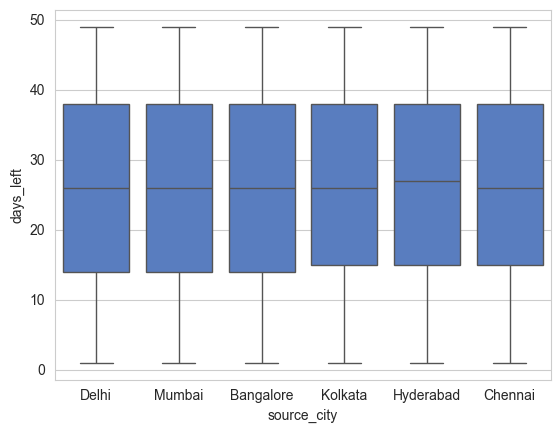

In [253]:
sns.boxplot(data=data,x="source_city",y="days_left")
plt.show()

In [254]:
data.groupby("source_city")['days_left'].describe()

,count,mean,std,min,25%,50%,75%,max
source_city,,,,,,,,
Bangalore,52061.0,25.955398,13.627462,1.0,14.0,26.0,38.0,49.0
Chennai,38700.0,26.095736,13.460905,1.0,15.0,26.0,38.0,49.0
Delhi,61343.0,25.970168,13.633365,1.0,14.0,26.0,38.0,49.0
Hyderabad,40806.0,26.374553,13.420966,1.0,15.0,27.0,38.0,49.0
Kolkata,46347.0,26.013162,13.511999,1.0,15.0,26.0,38.0,49.0
Mumbai,60896.0,25.769755,13.619620,1.0,14.0,26.0,38.0,49.0


Like we have seen before the 'days_left' feature is very well equilibrated

In [255]:
group_stats = data.groupby('source_city')['days_left'].agg(['count', 'mean', 'var'])
group_stats.columns = ['effectif', 'moyenne', 'variance']
N = len(data)
var_intra = (group_stats['effectif'] * group_stats['variance']).sum() / N
mu_total = data['days_left'].mean()
var_inter = ((group_stats['effectif'] * (group_stats['moyenne'] - mu_total)**2).sum()) / N
var_totale = data['days_left'].var()
var_totale2 = var_intra + var_inter
eta_squared = var_inter / var_totale
print(f"Rapport de corrélation η² = {eta_squared}")

Rapport de corrélation η² = 0.00017150945654982594


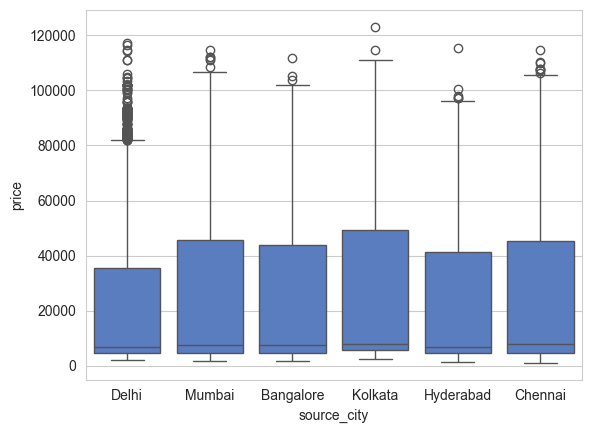

In [256]:
sns.boxplot(data=data,x="source_city",y="price")
plt.show()

In [257]:
data.groupby("source_city")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
source_city,,,,,,,,
Bangalore,52061.0,21469.460575,23171.386433,1603.0,4687.0,7488.0,43865.0,111883.0
Chennai,38700.0,21995.339871,23527.227014,1105.0,4672.0,7846.0,45185.0,114704.0
Delhi,61343.0,18951.326639,20920.410359,1998.0,4496.0,6840.0,35490.0,117307.0
Hyderabad,40806.0,20155.623879,21720.652723,1543.0,4593.0,6855.0,41314.0,115211.0
Kolkata,46347.0,21746.235679,23439.972854,2436.0,5853.0,7958.0,49207.0,123071.0
Mumbai,60896.0,21483.818839,23394.131784,1890.0,4658.0,7413.0,45693.0,114523.0


In average the less city to fly to is Delhi, with an average off 18951 and a median off 6840, huge difference surely due to the class

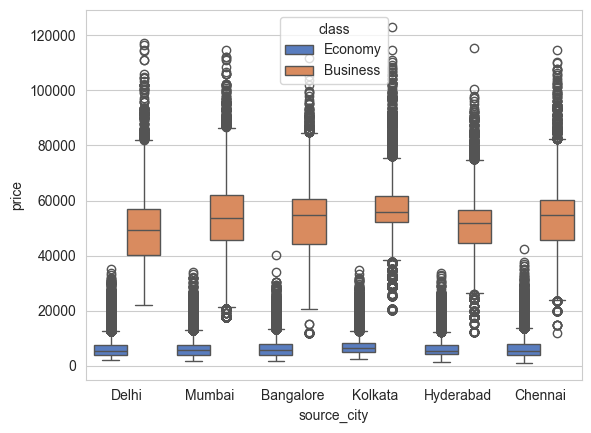

In [260]:
sns.boxplot(data=data,x="source_city",y="price",hue="class")
plt.show()

In [258]:
group_stats = data.groupby('source_city')['price'].agg(['count', 'mean', 'var'])
group_stats.columns = ['effectif', 'moyenne', 'variance']
N = len(data)
var_intra = (group_stats['effectif'] * group_stats['variance']).sum() / N
mu_total = data['price'].mean()
var_inter = ((group_stats['effectif'] * (group_stats['moyenne'] - mu_total)**2).sum()) / N
var_totale = data['price'].var()
var_totale2 = var_intra + var_inter
eta_squared = var_inter / var_totale
print(f"Rapport de corrélation η² = {eta_squared}")

Rapport de corrélation η² = 0.0024106855324976645


Let's continue with the departure_time feature


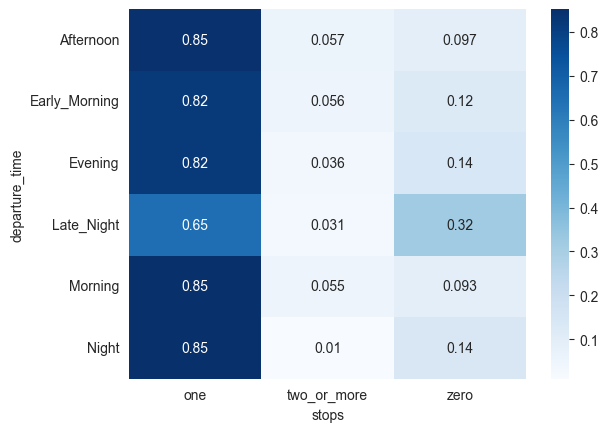

In [261]:
sns.heatmap(pd.crosstab(data["departure_time"],data['stops'],normalize='index'),annot=True, cmap='Blues')
plt.show()

In [262]:
data.groupby('departure_time')['stops'].value_counts()

departure_time  stops      
Afternoon       one            40402
                zero            4649
                two_or_more     2743
Early_Morning   one            54821
                zero            8260
                two_or_more     3709
Evening         one            53390
                zero            9351
                two_or_more     2361
Late_Night      one              849
                zero             417
                two_or_more       40
Morning         one            60574
                zero            6642
                two_or_more     3930
Night           one            40827
                zero            6685
                two_or_more      503
Name: count, dtype: int64

In [263]:
contingence=pd.crosstab(data["departure_time"],data["stops"])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 0.0


In [264]:
v = cramers_v(contingence)
print(f"Cramér’s V : {v:.4f}")

Cramér’s V : 0.0770


The features are statistically dependant but the V<0.2 so the features are only weakly associated

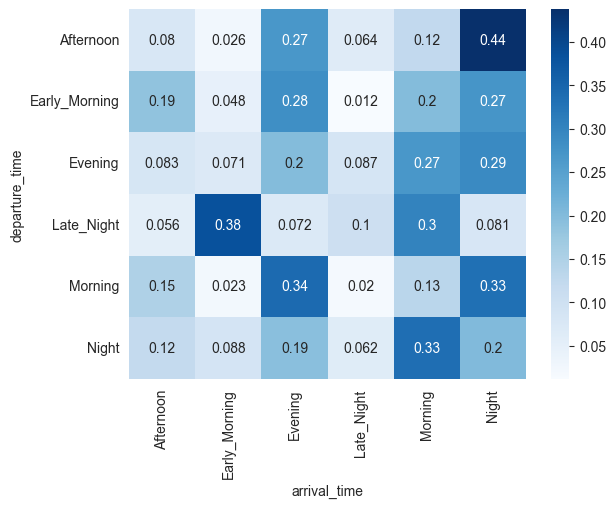

In [265]:
sns.heatmap(pd.crosstab(data["departure_time"],data['arrival_time'],normalize='index'),annot=True, cmap='Blues')
plt.show()

In [266]:
data.groupby('departure_time')['arrival_time'].value_counts()

departure_time  arrival_time 
Afternoon       Night            20915
                Evening          12862
                Morning           5914
                Afternoon         3823
                Late_Night        3052
                Early_Morning     1228
Early_Morning   Evening          18866
                Night            18161
                Morning          13343
                Afternoon        12435
                Early_Morning     3185
                Late_Night         800
Evening         Night            18924
                Morning          17498
                Evening          13003
                Late_Night        5644
                Afternoon         5407
                Early_Morning     4626
Late_Night      Early_Morning      501
                Morning            395
                Late_Night         137
                Night              106
                Evening             94
                Afternoon           73
Morning         Evening          2

In [267]:
contingence=pd.crosstab(data["departure_time"],data["arrival_time"])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 0.0


In [268]:
v = cramers_v(contingence)
print(f"Cramér’s V : {v:.4f}")

Cramér’s V : 0.1492


The features are statistically dependant but the V<0.2 so the features are only weakly associated

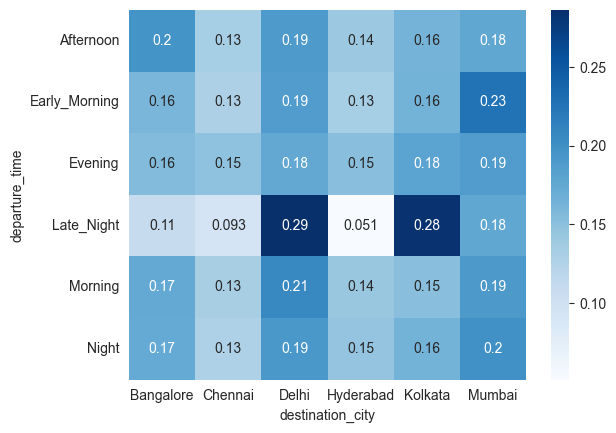

In [269]:
sns.heatmap(pd.crosstab(data["departure_time"],data['destination_city'],normalize='index'),annot=True, cmap='Blues')
plt.show()

Approximately 60% of the flights that departures late at night are going either to Delhi or to Kolkata

In [270]:
data.groupby('departure_time')['destination_city'].value_counts()

departure_time  destination_city
Afternoon       Bangalore            9366
                Delhi                9065
                Mumbai               8463
                Kolkata              7799
                Hyderabad            6722
                Chennai              6379
Early_Morning   Mumbai              15079
                Delhi               12527
                Kolkata             10930
                Bangalore           10723
                Hyderabad            8911
                Chennai              8620
Evening         Mumbai              12239
                Kolkata             11760
                Delhi               11402
                Bangalore           10153
                Hyderabad            9889
                Chennai              9659
Late_Night      Delhi                 374
                Kolkata               370
                Mumbai                231
                Bangalore             143
                Chennai               121
 

In [272]:
contingence=pd.crosstab(data["departure_time"],data["destination_city"])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 0.0


In [273]:
v = cramers_v(contingence)
print(f"Cramér’s V : {v:.4f}")

Cramér’s V : 0.0326


The features are statistically dependant but the V<0.2 so the features are only weakly associated

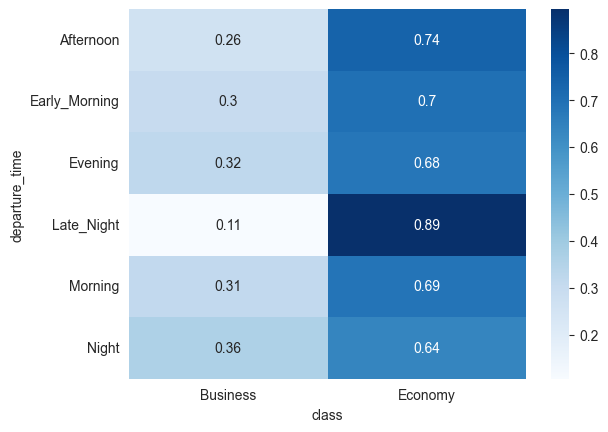

In [274]:
sns.heatmap(pd.crosstab(data["departure_time"],data['class'],normalize='index'),annot=True, cmap='Blues')
plt.show()

Approximately 90% of the flights with a late nigh departure are in a economy class, this shows that people that are richer prefers other departure times

In [275]:
data.groupby('departure_time')['class'].value_counts()

departure_time  class   
Afternoon       Economy     35245
                Business    12549
Early_Morning   Economy     46688
                Business    20102
Evening         Economy     44207
                Business    20895
Late_Night      Economy      1168
                Business      138
Morning         Economy     48821
                Business    22325
Night           Economy     30537
                Business    17478
Name: count, dtype: int64

In [ ]:
contingence=pd.crosstab(data["departure_time"],data["class"])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 0.0


In [277]:
v = cramers_v(contingence)
print(f"Cramér’s V : {v:.4f}")

Cramér’s V : 0.0700


The features are statistically dependant but the V<0.2 so the features are only weakly associated

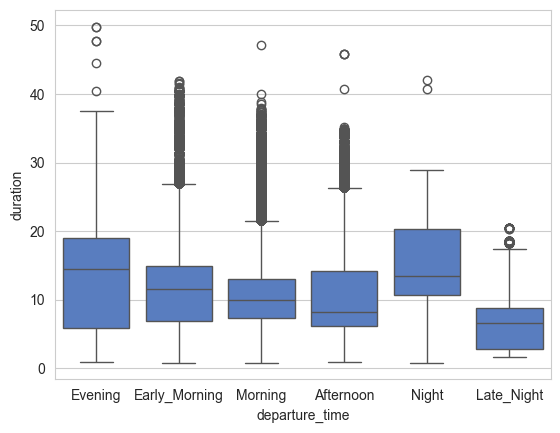

In [279]:
sns.boxplot(data=data,x='departure_time',y='duration')
plt.show()

The features are statistically dependant but the V<0.2 so the features are only weakly associated

In [280]:
data.groupby('departure_time')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
departure_time,,,,,,,,
Afternoon,47794.0,10.757008,7.228993,0.92,6.17,8.170,14.25,45.83
Early_Morning,66790.0,11.587945,6.522302,0.83,6.92,11.580,14.92,41.83
Evening,65102.0,13.642493,7.993218,0.92,5.92,14.500,19.00,49.83
Late_Night,1306.0,7.320383,4.914621,1.58,2.83,6.625,8.83,20.50
Morning,71146.0,11.303808,6.652363,0.83,7.33,10.000,13.00,47.08
Night,48015.0,14.123963,6.953127,0.83,10.67,13.420,20.25,42.00


From the results we can see that the maximal duration for Late night flights is only 20.5 wich is only 50% of the other departure times, the flights who have longer durations are in average the night flights.

We were using a lot of lines of code to have our η², let's make it a function

In [285]:
def eta_squar(col1,col2):
    group_stats = data.groupby(col1)[col2].agg(['count', 'mean', 'var'])
    group_stats.columns = ['effectif', 'moyenne', 'variance']
    N = len(data)
    var_intra = (group_stats['effectif'] * group_stats['variance']).sum() / N
    mu_total = data[col2].mean()
    var_inter = ((group_stats['effectif'] * (group_stats['moyenne'] - mu_total)**2).sum()) / N
    var_totale = data[col2].var()
    var_totale2 = var_intra + var_inter
    eta_squared = var_inter / var_totale
    print(f"Rapport de corrélation η² = {eta_squared}")

In [287]:
eta_squar('departure_time','duration')

Rapport de corrélation η² = 0.0338698087435054


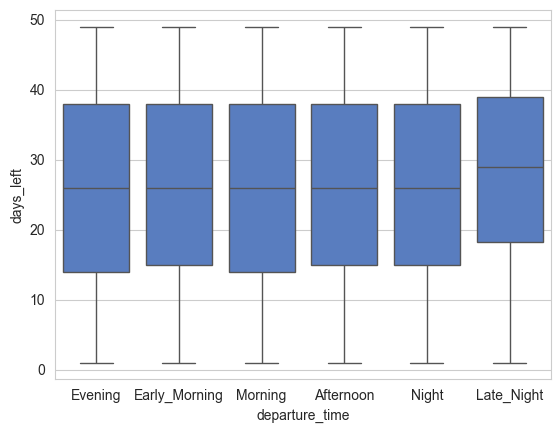

In [288]:
sns.boxplot(data=data,x='departure_time',y='days_left')
plt.show()

In [290]:
data.groupby('departure_time')['days_left'].describe()

,count,mean,std,min,25%,50%,75%,max
departure_time,,,,,,,,
Afternoon,47794.0,26.170251,13.483353,1.0,15.00,26.0,38.0,49.0
Early_Morning,66790.0,26.088950,13.519223,1.0,15.00,26.0,38.0,49.0
Evening,65102.0,25.740945,13.728720,1.0,14.00,26.0,38.0,49.0
Late_Night,1306.0,28.466309,12.257925,1.0,18.25,29.0,39.0,49.0
Morning,71146.0,25.926756,13.574235,1.0,14.00,26.0,38.0,49.0
Night,48015.0,26.129189,13.469969,1.0,15.00,26.0,38.0,49.0


Like we have seen the data was well collected as for the days left, it is equilibrated

In [291]:
eta_squar('departure_time','days_left')

Rapport de corrélation η² = 0.00027904789851014355


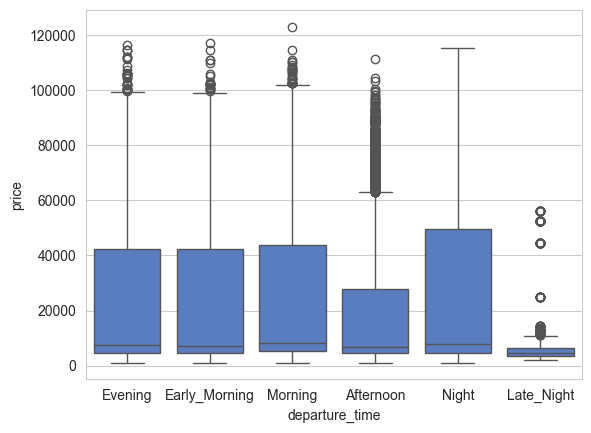

In [292]:
sns.boxplot(data=data,x='departure_time',y='price')
plt.show()

In [293]:
data.groupby('departure_time')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
departure_time,,,,,,,,
Afternoon,47794.0,18179.203331,20928.840445,1105.0,4593.0,6663.0,27976.0,111437.0
Early_Morning,66790.0,20370.676718,22354.875275,1105.0,4757.0,7212.0,42424.0,117307.0
Evening,65102.0,21232.361894,23168.515406,1105.0,4593.0,7425.0,42521.0,116562.0
Late_Night,1306.0,9295.299387,13680.515549,2050.0,3393.0,4499.0,6459.5,56058.0
Morning,71146.0,21630.760254,22968.909569,1105.0,5208.0,8112.0,43865.0,123071.0
Night,48015.0,23062.146808,23617.883277,1105.0,4731.0,7813.0,49553.0,115211.0


As we saw before there was a very low number of flights departuring late at night and in a Business class, that's one of the reasosn why the lowest price is at late night

In [294]:
eta_squar('departure_time','price')

Rapport de corrélation η² = 0.005289951963641053


Let's continue with the stops feature

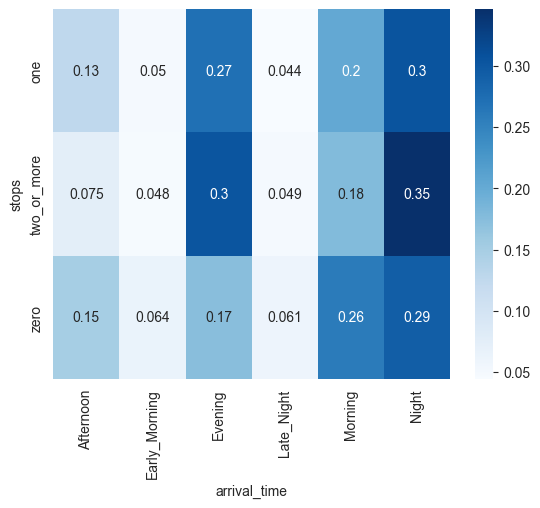

In [295]:
sns.heatmap(pd.crosstab(data['stops'],data['arrival_time'],normalize='index'),annot=True,cmap='Blues')
plt.show()

We can see that the arrival time is rarely late night wich is normal, because arriving late at night makes it difficult to get to the hotel due to the time

In [296]:
contingence=pd.crosstab(data["stops"],data["arrival_time"])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 0.0


In [297]:
v = cramers_v(contingence)
print(f"Cramér’s V : {v:.4f}")

Cramér’s V : 0.0661


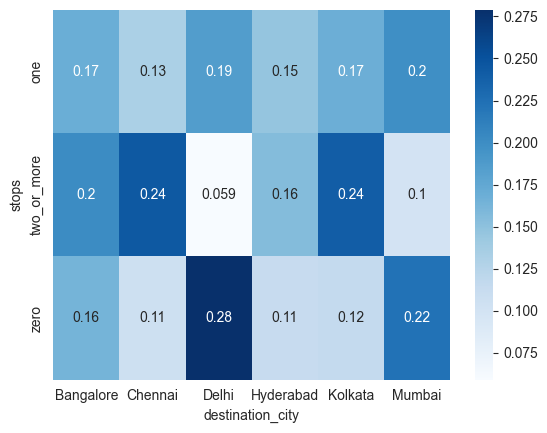

In [298]:
sns.heatmap(pd.crosstab(data['stops'],data['destination_city'],normalize='index'),annot=True,cmap='Blues')
plt.show()

Approximately 50% of the direct flights are going either to Delhi or to Mumbai

In [299]:
contingence=pd.crosstab(data["stops"],data["destination_city"])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 0.0


In [300]:
v = cramers_v(contingence)
print(f"Cramér’s V : {v:.4f}")

Cramér’s V : 0.1017


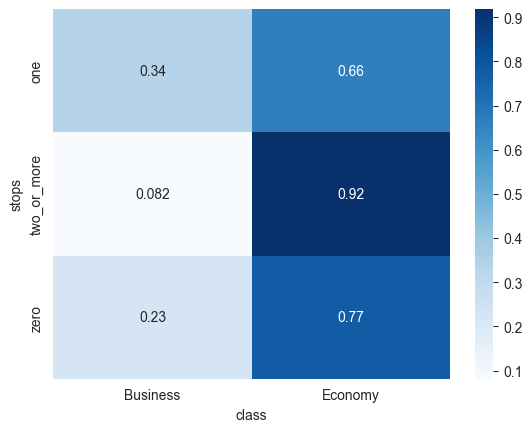

In [301]:
sns.heatmap(pd.crosstab(data['stops'],data['class'],normalize='index'),annot=True,cmap='Blues')
plt.show()

In [302]:
contingence=pd.crosstab(data["stops"],data["class"])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 0.0


In [303]:
v = cramers_v(contingence)
print(f"Cramér’s V : {v:.4f}")

Cramér’s V : 0.1321


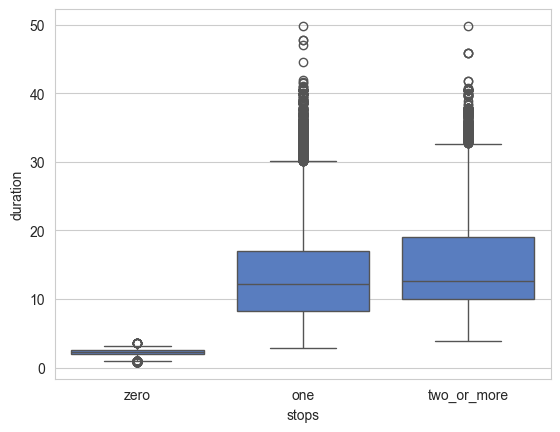

In [305]:
sns.boxplot(data=data,x='stops',y='duration')
plt.show()

In [308]:
data.groupby('stops')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
stops,,,,,,,,
one,250863.0,13.496514,6.510456,2.92,8.25,12.25,17.00,49.83
two_or_more,13286.0,15.317141,7.392067,3.92,10.00,12.67,19.08,49.83
zero,36004.0,2.191324,0.500995,0.83,1.92,2.25,2.58,3.58


When there is no stops the maximal duration is 3.58, we can clearly see and it is obvious that the variability of the duration is explained by the number of stops, let's see what percentage is explained

In [307]:
eta_squar('stops','duration')

Rapport de corrélation η² = 0.26777475893385194


So 26,78% of the duration is explainde by the number of stops

In [310]:
data.groupby('stops')['days_left'].describe()

,count,mean,std,min,25%,50%,75%,max
stops,,,,,,,,
one,250863.0,26.073893,13.535163,1.0,15.0,26.0,38.0,49.0
two_or_more,13286.0,24.831176,13.700145,1.0,13.0,24.0,37.0,49.0
zero,36004.0,25.956060,13.669166,1.0,14.0,26.0,38.0,49.0


In [311]:
eta_squar('stops','days_left')

Rapport de corrélation η² = 0.000354777849144195


The variabiliy of the days_left is not explained by the number of stops wich is normal

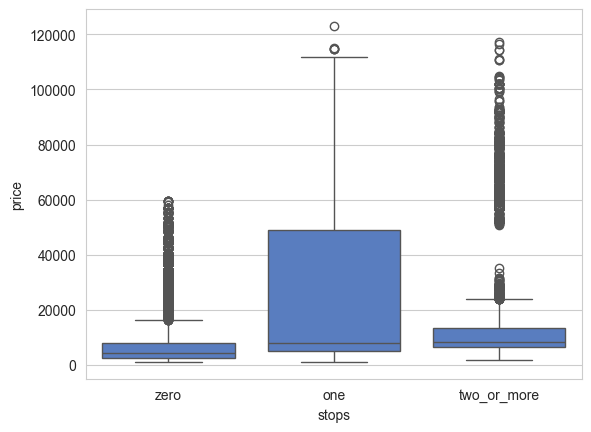

In [312]:
sns.boxplot(data=data,x='stops',y='price')
plt.show()

In [313]:
data.groupby('stops')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
stops,,,,,,,,
one,250863.0,22900.992482,23626.066584,1105.0,5136.0,7959.0,48851.0,123071.0
two_or_more,13286.0,14113.450775,17664.332033,1966.0,6432.0,8307.0,13419.0,117307.0
zero,36004.0,9375.938535,10623.008293,1105.0,2586.0,4499.0,8064.0,59573.0


In [314]:
eta_squar('stops','price')

Rapport de corrélation η² = 0.041373495001696035


Let's continue with the 'arrival_time' feature

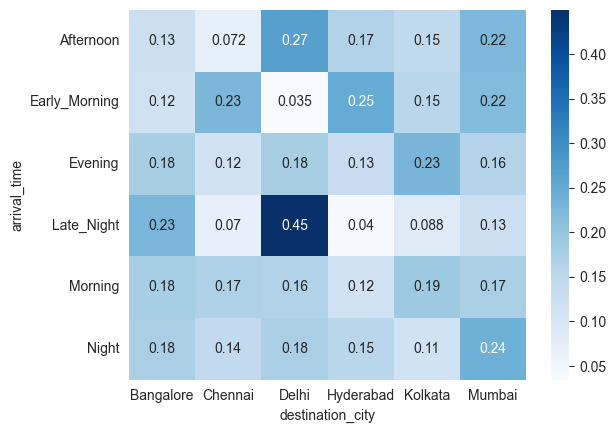

In [315]:
sns.heatmap(pd.crosstab(data['arrival_time'],data['destination_city'],normalize='index'),annot=True,cmap='Blues')
plt.show()

Seems like nearly the half of the flights arrive at Delhi late at night

In [316]:
contingence=pd.crosstab(data['arrival_time'],data['destination_city'])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-velue is: {p}")

The p-velue is: 0.0


In [320]:
v=cramers_v(contingence)
print(f"Cramer's V: {v:.4f}")

Cramer's V: 0.1201


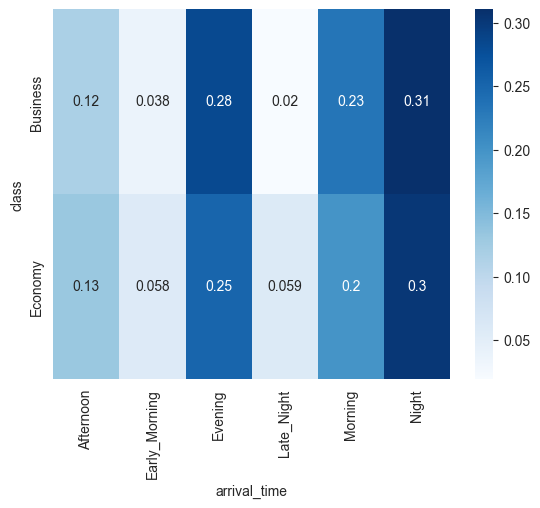

In [324]:
sns.heatmap(pd.crosstab(data['class'],data['arrival_time'],normalize='index'),annot=True,cmap='Blues')
plt.show()

In [322]:
contingence=pd.crosstab(data['arrival_time'],data['class'])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-velue is: {p}")

The p-velue is: 0.0


In [323]:
v=cramers_v(contingence)
print(f"Cramer's V: {v:.4f}")

Cramer's V: 0.1059


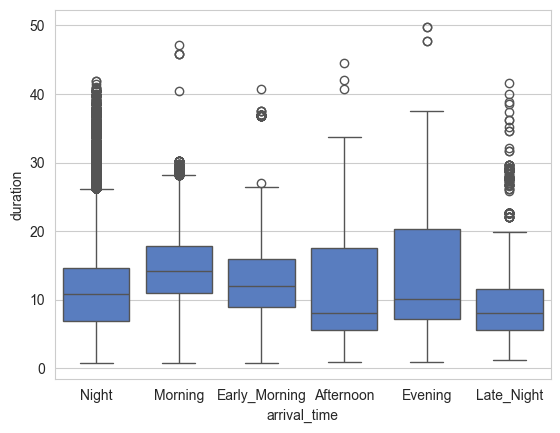

In [325]:
sns.boxplot(data=data,x='arrival_time',y='duration')
plt.show()

In [326]:
data.groupby('arrival_time')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
arrival_time,,,,,,,,
Afternoon,38139.0,11.393490,7.611822,0.92,5.58,8.08,17.58,44.50
Early_Morning,15417.0,12.559448,6.751521,0.83,8.92,12.00,16.00,40.75
Evening,78323.0,12.621578,7.649785,0.92,7.25,10.08,20.25,49.83
Late_Night,14001.0,8.732261,4.771846,1.17,5.58,8.08,11.50,41.58
Morning,62735.0,13.940608,7.067601,0.83,10.92,14.25,17.83,47.08
Night,91538.0,11.521187,6.721846,0.83,6.83,10.83,14.58,41.83


In [329]:
eta_squar('arrival_time','duration')

Rapport de corrélation η² = 0.028418089348144455


Only 3% of the variability of the duration is explained by the arrival time

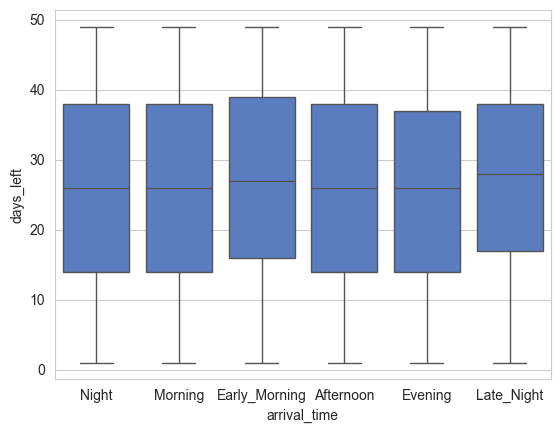

In [330]:
sns.boxplot(data=data,x='arrival_time',y='days_left')
plt.show()

In [331]:
data.groupby('arrival_time')['days_left'].describe()

,count,mean,std,min,25%,50%,75%,max
arrival_time,,,,,,,,
Afternoon,38139.0,25.958940,13.641680,1.0,14.0,26.0,38.0,49.0
Early_Morning,15417.0,27.182201,13.307677,1.0,16.0,27.0,39.0,49.0
Evening,78323.0,25.691240,13.471323,1.0,14.0,26.0,37.0,49.0
Late_Night,14001.0,27.629384,12.700185,1.0,17.0,28.0,38.0,49.0
Morning,62735.0,25.909285,13.698348,1.0,14.0,26.0,38.0,49.0
Night,91538.0,25.910715,13.651792,1.0,14.0,26.0,38.0,49.0


In [332]:
eta_squar('arrival_time','days_left')

Rapport de corrélation η² = 0.0012226478724124904


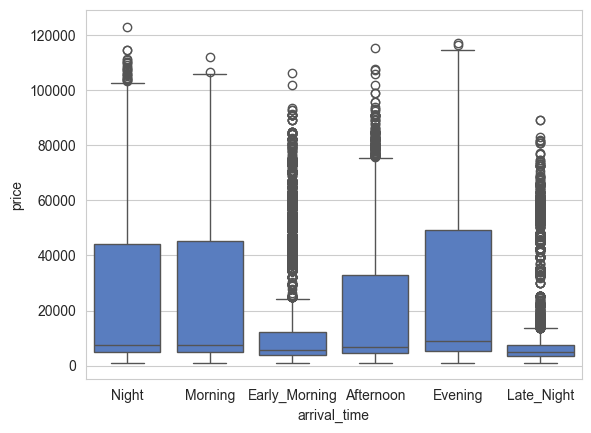

In [333]:
sns.boxplot(data=data,x='arrival_time',y='price')
plt.show()

In [334]:
data.groupby('arrival_time')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
arrival_time,,,,,,,,
Afternoon,38139.0,18494.598993,20430.012514,1105.0,4542.0,6714.0,32923.0,115211.0
Early_Morning,15417.0,14993.139521,18898.694495,1105.0,3988.0,5800.0,12108.0,106416.0
Evening,78323.0,23044.371615,23494.642663,1105.0,5395.0,8854.0,49177.0,117307.0
Late_Night,14001.0,11284.906078,16399.121594,1105.0,3336.0,4867.0,7488.0,89257.0
Morning,62735.0,22231.076098,23266.076096,1105.0,4792.0,7687.0,45257.0,111964.0
Night,91538.0,21586.758341,23298.011624,1105.0,4979.0,7584.0,44280.0,123071.0


In average the chepest flights are those who arrive late at night

In [336]:
eta_squar('arrival_time','price')

Rapport de corrélation η² = 0.01660308599469574


Let's continue with the destination city feature

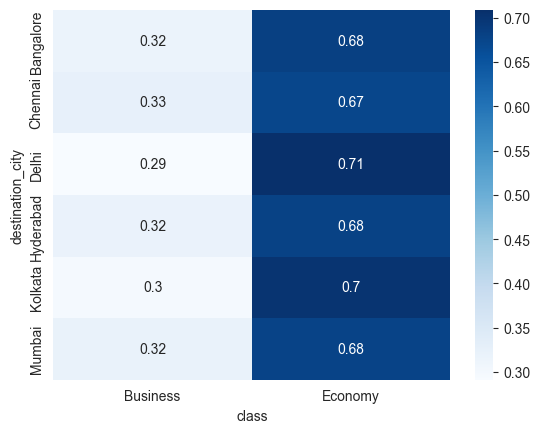

In [337]:
sns.heatmap(pd.crosstab(data['destination_city'],data['class'],normalize='index'),annot=True,cmap='Blues')
plt.show()

In [338]:
contingence=pd.crosstab(data['destination_city'],data['class'])
chi2,p,dofree,expected_fr=chi2_contingency(contingence)
print(f"The p-value is: {p}")

The p-value is: 6.408771472142409e-50


In [340]:
V=cramers_v(contingence)
print(f"The Cramer's V is: {V:.3f}")

The Cramer's V is: 0.028


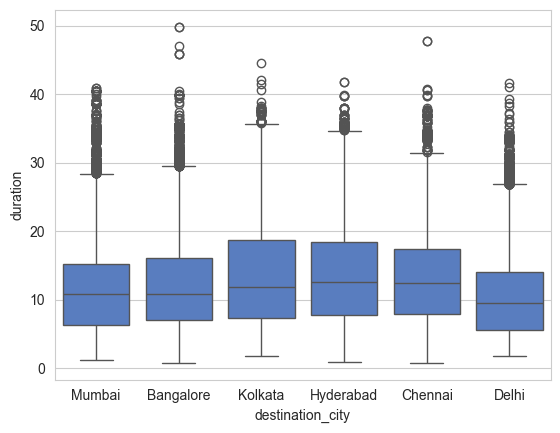

In [341]:
sns.boxplot(data,x='destination_city',y='duration')
plt.show()

In [343]:
data.groupby('destination_city')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
destination_city,,,,,,,,
Bangalore,51068.0,12.058039,7.005259,0.83,7.08,10.92,16.08,49.83
Chennai,40368.0,13.338900,7.338479,0.83,8.00,12.42,17.42,47.75
Delhi,57360.0,10.513310,6.605293,1.83,5.58,9.50,14.08,41.58
Hyderabad,42726.0,13.381945,7.488314,1.00,7.75,12.58,18.50,41.83
Kolkata,49534.0,13.214953,7.427698,1.75,7.33,11.83,18.67,44.50
Mumbai,59097.0,11.583355,6.962312,1.25,6.33,10.92,15.17,40.92


In average the fastest flights are those in destination to Delhi

In [344]:
eta_squar('destination_city','duration')

Rapport de corrélation η² = 0.02251983612346283


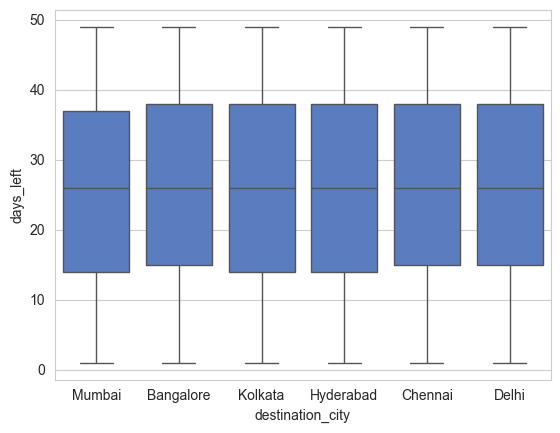

In [345]:
sns.boxplot(data,x='destination_city',y='days_left')
plt.show()

In [346]:
data.groupby('destination_city')['days_left'].describe()

,count,mean,std,min,25%,50%,75%,max
destination_city,,,,,,,,
Bangalore,51068.0,26.048582,13.587442,1.0,15.0,26.0,38.0,49.0
Chennai,40368.0,26.020437,13.490350,1.0,15.0,26.0,38.0,49.0
Delhi,57360.0,26.178644,13.528932,1.0,15.0,26.0,38.0,49.0
Hyderabad,42726.0,26.004166,13.632719,1.0,14.0,26.0,38.0,49.0
Kolkata,49534.0,25.887633,13.617039,1.0,14.0,26.0,38.0,49.0
Mumbai,59097.0,25.885967,13.516721,1.0,14.0,26.0,37.0,49.0


In [347]:
eta_squar('destination_city','days_left')

Rapport de corrélation η² = 6.079571331851959e-05


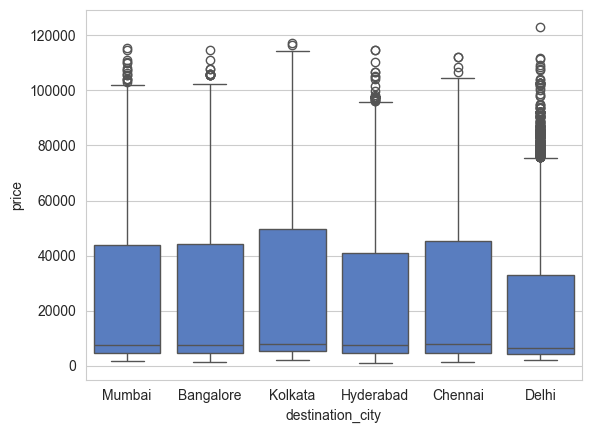

In [348]:
sns.boxplot(data,x='destination_city',y='price')
plt.show()

In [349]:
data.groupby('destination_city')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
destination_city,,,,,,,,
Bangalore,51068.0,21593.955784,23271.409165,1443.0,4727.75,7425.0,44144.0,114523.0
Chennai,40368.0,21953.323969,23189.300129,1543.0,4672.00,7900.0,45257.0,111964.0
Delhi,57360.0,18436.767870,20485.727116,2051.0,4439.00,6521.0,32923.0,123071.0
Hyderabad,42726.0,20427.661284,21840.231366,1105.0,4589.00,7548.0,41064.0,114705.0
Kolkata,49534.0,21959.557556,23750.590141,2056.0,5293.25,7767.0,49725.0,117307.0
Mumbai,59097.0,21372.529469,23409.185278,1830.0,4792.00,7496.0,44025.0,115211.0


In [350]:
eta_squar('destination_city','price')

Rapport de corrélation η² = 0.0032057283414490866


Let's analyze the last categorical class

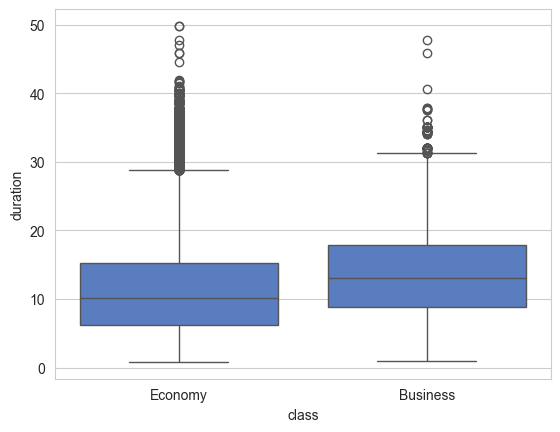

In [355]:
sns.boxplot(data,x='class',y='duration')
plt.show()

In [356]:
data.groupby('class')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Business,93487.0,13.704274,6.852555,1.00,8.83,13.08,17.83,47.75
Economy,206666.0,11.550060,7.241284,0.83,6.25,10.17,15.25,49.83


The business class have in average longest flights, could be because the benefits of the business class are more important when the flight is long?

In [357]:
eta_squar('class','duration')

Rapport de corrélation η² = 0.019240380749363243


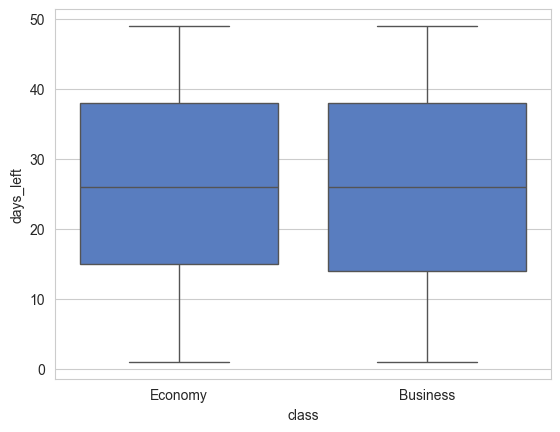

In [358]:
sns.boxplot(data,x='class',y='days_left')
plt.show()

In [359]:
data.groupby('class')['days_left'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Business,93487.0,25.741857,13.626538,1.0,14.0,26.0,38.0,49.0
Economy,206666.0,26.123673,13.529610,1.0,15.0,26.0,38.0,49.0


In [360]:
eta_squar('class','days_left')

Rapport de corrélation η² = 0.000170003967421788


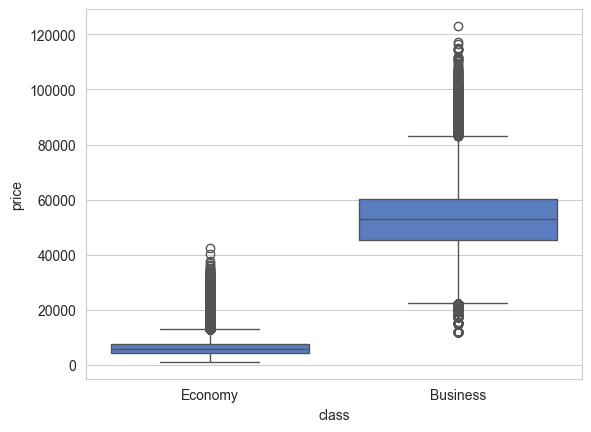

In [361]:
sns.boxplot(data,x='class',y='price')
plt.show()

In [362]:
data.groupby('class')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Business,93487.0,52540.081124,12969.314606,12000.0,45185.0,53164.0,60396.0,123071.0
Economy,206666.0,6572.342383,3743.519517,1105.0,4173.0,5772.0,7746.0,42349.0


In [363]:
eta_squar('class','price')

Rapport de corrélation η² = 0.8795790567114595


88% of the variability of the price is explained by the class feauture, wich is absolutely normal

Let's start with the quantitative variable versus quantitative variable

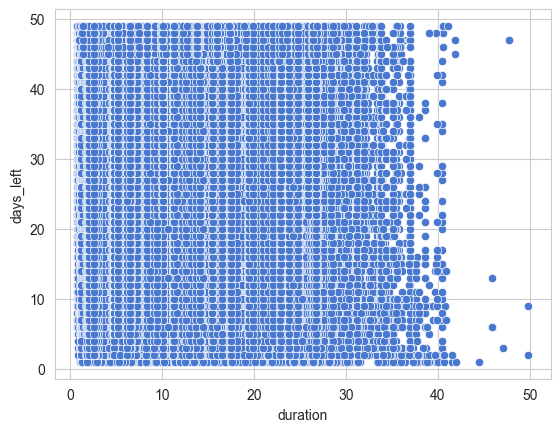

In [364]:
sns.scatterplot(data,x='duration',y='days_left')
plt.show()

Seems like there is no link between these 2 features

In [365]:
data[['duration','days_left']].corr(method='pearson')

,duration,days_left
duration,1.000000,-0.039157
days_left,-0.039157,1.000000


The two features have a very low linear correlation

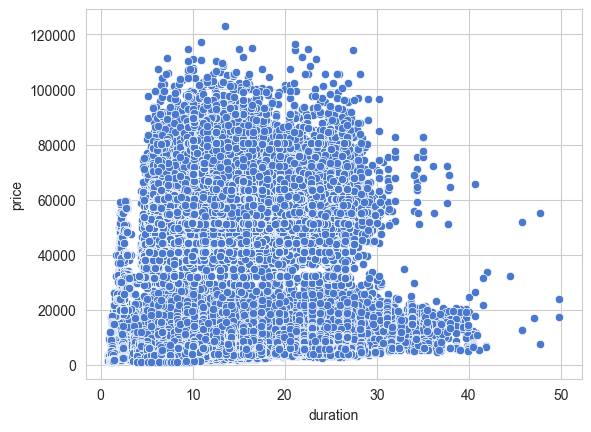

In [ ]:
sns.scatterplot(data,x='duration',y='price')
plt.show()

In [367]:
data[['duration','price']].corr(method='pearson')

,duration,price
duration,1.000000,0.204222
price,0.204222,1.000000


There is a small linear correlation

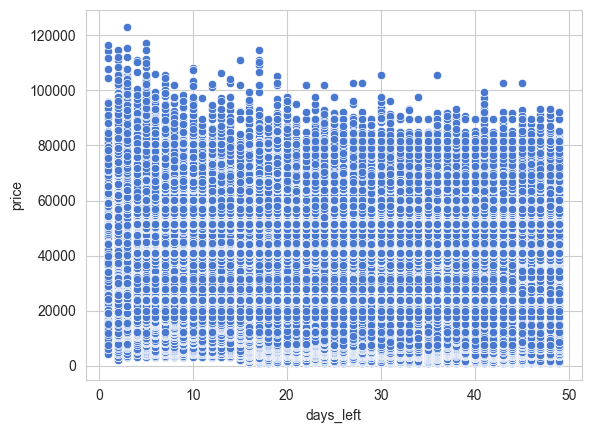

In [368]:
sns.scatterplot(data,x='days_left',y='price')
plt.show()

In [369]:
data[['days_left','price']].corr(method='pearson')

,days_left,price
days_left,1.000000,-0.091949
price,-0.091949,1.000000


This exploratory phase showed us that most of the features (besides the price feautre) aren't dependent or there is no correlation between them, we will now start the preprocessing phase 